In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Нелінійна оптимізація. ДЗ1 (від 22.09)
Корешков

## Задача 1
Дослідити обмеження на коефіцієнти у штрафній функції

Знайти $\max x^2, \text{s.t. } x\le 15 $.

Зверну увагу що $x\le 15 \iff (x-15) \le 0$

Ця задача відповідає наступним задачам безумовної оптимізації:
1. Гладка:  
    $f(x) = x^2 - P(\max(x-15, 0))^2$
2. Негладка:  
    $g(x) = x^2 - P\max(x-15, 0)$

З аналітичних міркувань, знаємо, що максимум досягається при $\hat x = 15$

### Проілюструю ці випадки

In [9]:
def f(x, P):
    return x**2 - P*(np.maximum(x-15, 0))**2

def g(x, P):
    return x**2 - P*np.maximum(x-15, 0)

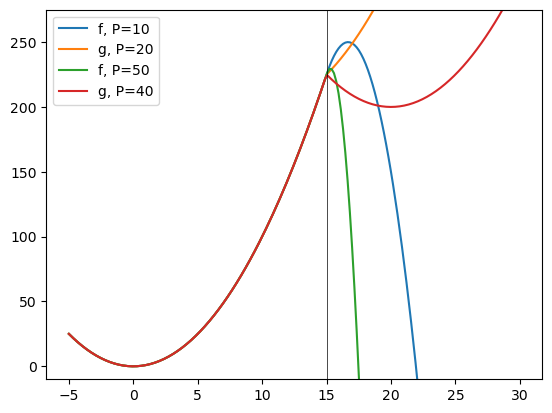

In [33]:
X = np.linspace(-5,30, 200)
plt.plot(X, f(X,10), label=f"f, P=10")
plt.plot(X, g(X,20), label=f"g, P=20")
plt.plot(X, f(X,50), label=f"f, P=50")
plt.plot(X, g(X,40), label=f"g, P=40")
plt.legend()
plt.ylim(-10, 15*15 + 50)
plt.axvline(15, lw=0.5, c='k')

### Для гладкої функції

$$f'(x) = 2x - P((x-15)^2)'_x = 2x - 2P(x-15) = 2(15P + x(1-P)) = 0$$
$$x^*_P = -15\frac{P}{1-P}$$
Розглянемо які можуть бути значення $P$ щоб екстремум $f$ відрізнявся від екстремуму початкової функції не більше ніж на $\varepsilon$.
$$|15\frac{P}{P-1} - 15| < \varepsilon, \quad \frac{P}{P-1} > 1 \text{ для } P > 1$$
$$15(\frac{P}{P-1}-1)<\varepsilon$$
$$P-P+1<\frac{\varepsilon}{15}P - \frac{\varepsilon}{15}$$
$$P > \frac{15}{\varepsilon} + 1$$

Нехай $\varepsilon = 10^{-n}$.  
Тоді $P > 15\cdot 10^n + 1$

### Для негладкої функції

$$g'(x) = \begin{cases}
    2x, x<15\\
    [2x-P, 2x], x=15\\
    2x-P, x>15
\end{cases}$$

Достатня умова екстремуму для негладкої функції полягає у тому, що субградієнт містить точку 0.  
Для нашої задачі, $0\in [30-P, 30]$. Тобто, маємо $P>30$.

## Задача 2
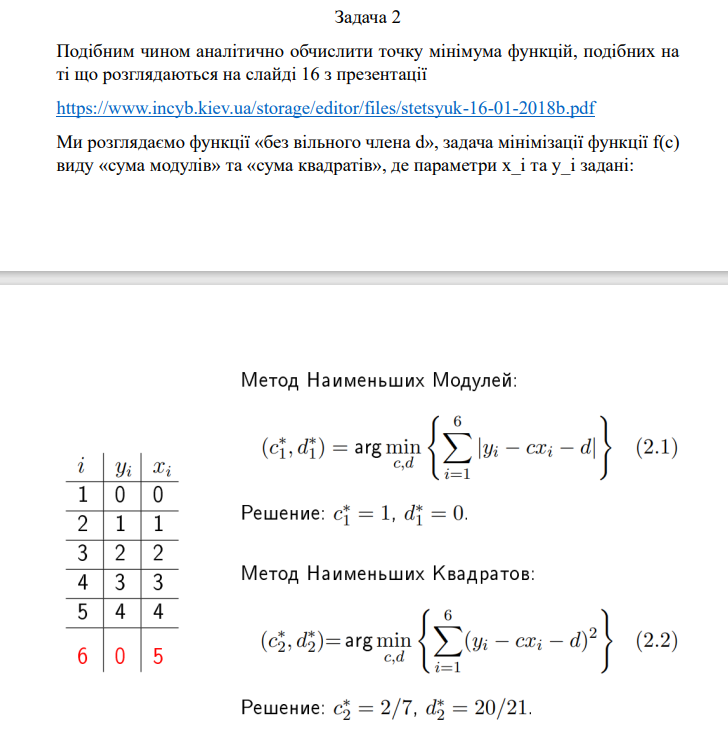

$F(x) = |0-0c| + |1-1c| + |2-2c| + |3-3c| + |4-4c| + |0-5c|$  
$G(x) = (0-0c)^2 + (1-1c)^2 + (2-2c)^2 + (3-3c)^2 + (4-4c)^2 + (0-5c)^2$
Мінімізуємо $F, G$ за змінною $c$.

### Гладкий випадок
Достатня умова екстремуму - похідна 0.  
$G'(x) = 110c-60 = 0$  
$c = \frac{6}{11}$  
$G(0) = 0,\; G(1) = \frac{6}{11}, \; G(5)=\frac{60}{11}=5.45$  

Отже, оптимальне значення $c=\frac{6}{11}$ 


### Негладкий випадок
Достатня умова екстремуму - субградієнт містить 0.  
$h(x) = |x-1|'_x = \begin{cases}
    -1, x<1\\
    1, x>1\\
    [-1,1], x=1
\end{cases}$  
$F'(x) = h(x) + 2h(x) + 3h(x) + 4h(x) + 5|x| =$  
$= 10h(x) + 5|x| = \begin{cases}
    -15, x<0\\
    [-15,-5], x=0\\
    -5, 0<x<1\\
    [-5,15], x=1\\
    15, x>1 
\end{cases}$

0 міститься в субградієнті лише в точці $x=1$.  
Отже, оптимальне значення $c=1$

Зобразимо функції, які ми оптимізуємо

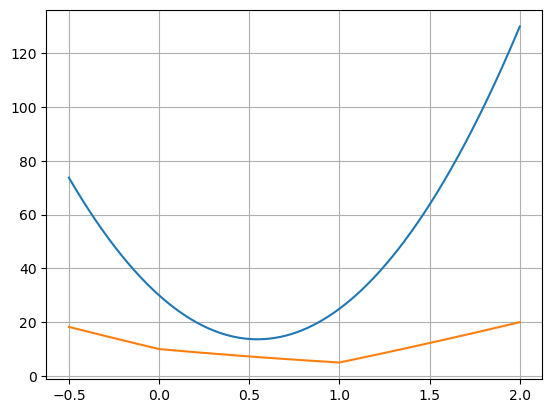

In [41]:
X = np.linspace(-0.5,2,500)

def G(c):
    return (1-1*c)**2 + (2-2*c)**2 + (3-3*c)**2 + (4-4*c)**2 + (0-5*c)**2
def F(c):
    return np.abs(1-1*c)**2 + np.abs(2-2*c) + np.abs(3-3*c) + np.abs(4-4*c)+np.abs(5*c)

plt.plot(X, G(X), label='smooth')
plt.plot(X, F(X), label='non-smooth')
# plt.axvline(6/11, lw=0.5, c='k')
plt.grid()

## Задача 3
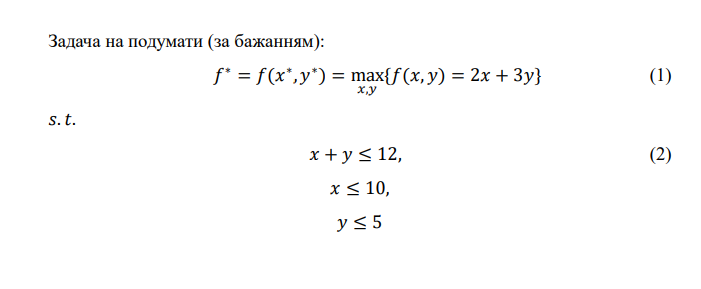


Розглянемо оптимізацію із негладкими штрафними функціями  
$F(x,y) = 2x+3y - A(x-10)_+ - B(y-5)_+ - C(x+y-12)_+ \to \max$

Достатня умова екстремуму для негладкої функції багатьох аргументів -- гладка оболонка субградієнтів має містити нуль.

$((x-10)_+)'_x = \begin{cases}
    0, x<10\\
    [0,1], x=10\\
    1, x>10
\end{cases}$  
Аналогічно для $(y-5)_+$  

$((x+y-12)_+) = \begin{cases}
    0, x+y<12\\
    (1,1), x+y>=12\\
\end{cases}$

$F'(x,y) = (2,3) - (A,0)\{x\ge 10\} - (0,B)\{y\ge 5\} - C(1,1)\{x+y\ge 12\}$

Точки які мене цікавлять:
- $x=10, y<2$
- $x<7, y=5$
- $x<10, y<5, x+y=12$
- $x=10, y=2$
- $x=7, y=5$

$F'(x,y) = \begin{cases}
    (2,3), \; x<10, y<5, x+y<12\\
    (2-A,3), \; x=10, y<2<5, x+y<12\\
    (2,3-B), \; x<7, y=5, x+y<12\\
    S((2,3), (2-C,3-C)), \; x<10, y<5, x+y=12\\
    S((2,3), (2-A, 3), (2-C, 3-C)), \; x=10, y=2, x+y=12\\
    S((2,3), (2, 3-B), (2-C, 3-C)), \; x=7, y=5, x+y=12
\end{cases}$

Субградієнт містить 0 у точках на відрізку $(7,5) - (10,2)$.  
Розгляну субградієнт на цій прямій.

$ S((2,3), (2-C, 3-C)) = \{(2-2t+2t-Ct, 3-3t+3t-Ct)\} = \{(2-Ct, 3-Ct)\} = \{(2,3)- Ct(1,1)\} $  
Тоді $(0,0) \notin  S((2,3), (2-C, 3-C))$. Тобто екстремуму немає на відрізку $(7,5) - (10,2)$ без граничних точок.

В точці $(10,2)$:  
$S((2,3), (2-A, 3), (2-C, 3-C))$  
$2x+(2-A)y+(2-C)z = 0$  
$3x+3y+(3-C)z = 0$  
$x+y+z=1$

$2(x+y+z) - Ay - Cz = 2 - Ay-Cz = 0$  
$3(x+y+z) - Cz = 3 - Cz = 0$  
$z = 3/C, \quad y = -1/A < 0$

Але $y>0$ за вимогою опуклої комбінації.
Тобто, нуль не міститься в субградієнті, а отож в точці $(10,2)$ не може бути екстремуму.

В точці $(7,5)$:  
$S((2,3), (2, 3-B), (2-C, 3-C))$  
$2x+2y+2z-Cz = 0$  
$3x+3y-By+3z-Cz = 0$  
$x+y+z=1$

$2-Cz=0$  
$3-By-Cz = 0$

$z = 2/C$  
$y = 1/B$
$x = 1-2/C-1/B$

Знайшли опуклу комбінацію що містить нуль.

Отже, екстремум в точці $(7,5)$.


Проіллюструю це:

Text(0.5, 0, 'z')

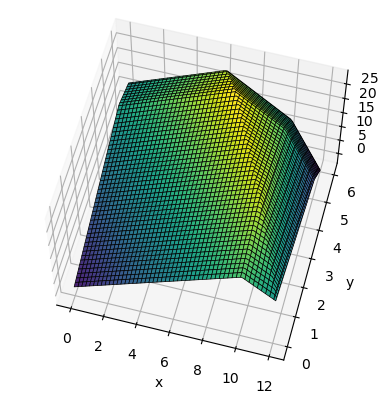

In [69]:
%matplotlib inline

X = np.linspace(0,12,100)
Y = np.linspace(0,6,100)
xx,yy = np.meshgrid(X,Y)

A,B,C = 5,5,5

z = 2*xx + 3*yy - A*np.maximum(xx-10,0) - B*np.maximum(yy-5,0) - C*np.maximum(xx+yy-12,0)

ax = plt.figure().add_subplot(projection='3d')
ax.view_init(60, -75, 0)
ax.plot_surface(xx, yy, z, cmap='viridis', edgecolor='k',  linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.contour3D(xx, yy, z, 50, alpha=1)